# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,0.394940,1.935899,-0.359235,1.822466,-0.054693,0.857551,-0.053336,0.529098,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,-1.159036,0.719861,0.622591,-0.157846,-0.373298,-0.515740,-0.117206,-0.569763,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,-0.703073,0.588971,-0.146823,-0.181353,-0.690156,-0.028327,0.410035,-0.828869,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,1.136838,0.648191,-0.468076,1.016010,0.206836,-0.138604,-0.066788,0.459306,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,-1.352709,-0.995678,-0.887039,0.732821,-0.557246,-2.412225,0.200509,0.823963,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [5]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,0.033738,-0.047544,0.014048,-0.053556,-0.011562,-0.031559,-0.045020,-0.005966,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,1.096583,1.208918,0.995720,1.193859,0.916783,1.000876,1.186014,0.892478,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,-4.339319,-18.431131,-3.844974,-19.214325,-3.894020,-13.303888,-24.019099,-9.335193,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,-0.748920,-0.421077,-0.633399,-0.449537,-0.597618,-0.478844,-0.494037,-0.497440,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,-0.010467,0.137410,-0.003826,0.037809,0.041502,0.059667,-0.067213,-0.000928,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,0.760396,0.612790,0.675571,0.485859,0.637263,0.517753,0.403942,0.514982,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,12.018913,4.574082,3.685570,7.667726,3.680272,6.098529,9.207059,4.054462,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


Skewed Class Distribution

In [6]:
print('No Frauds : %.2f %%' %(round(data['Class'].value_counts()[0]/len(data) * 100,2)))
print('Frauds : %.2f %%' %(round(data['Class'].value_counts()[1]/len(data) * 100,2)))

No Frauds : 99.14 %
Frauds : 0.86 %


Text(0.5, 1.0, 'Class Distributions')

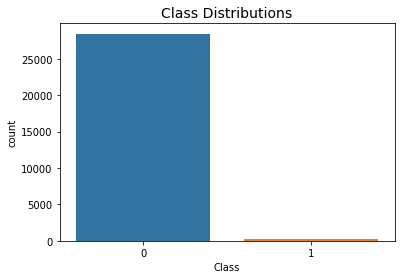

In [7]:
sns.countplot('Class', data=data)
plt.title('Class Distributions', fontsize=14)

#Logistic Regression<br>


*   Skewed Class Distribution -> StratifiedKFold



In [8]:
X = data.drop('Class', axis=1)
y = data['Class']

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
skfold=StratifiedKFold(n_splits=5)
 # -> 폴드 세트 5번 돌면서 달라지는 train/validation의 row index 반환

iter=0
for train_in, test_in in skfold.split(data,y):
  iter+=1
  y_train=data['Class'].iloc[train_in]
  y_test=data['Class'].iloc[test_in]
  print('## 교차 검증 : {0}'.format(iter))
  print("학습 레이블 데이터 분포 : \n", y_train.value_counts())
  print("검증 레이블 데이터 분포 : \n", y_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
 0    22745
1      197
Name: Class, dtype: int64
검증 레이블 데이터 분포 : 
 0    5687
1      49
Name: Class, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 : 
 0    22745
1      197
Name: Class, dtype: int64
검증 레이블 데이터 분포 : 
 0    5687
1      49
Name: Class, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 : 
 0    22746
1      196
Name: Class, dtype: int64
검증 레이블 데이터 분포 : 
 0    5686
1      50
Name: Class, dtype: int64
## 교차 검증 : 4
학습 레이블 데이터 분포 : 
 0    22746
1      197
Name: Class, dtype: int64
검증 레이블 데이터 분포 : 
 0    5686
1      49
Name: Class, dtype: int64
## 교차 검증 : 5
학습 레이블 데이터 분포 : 
 0    22746
1      197
Name: Class, dtype: int64
검증 레이블 데이터 분포 : 
 0    5686
1      49
Name: Class, dtype: int64


In [11]:
skfold=StratifiedKFold(n_splits=5)
log_reg = LogisticRegression()
cv_accur=[]
iter=0

for train_in,test_in in skfold.split(X,y):
  X_train,X_test=X.loc[train_in],X.loc[test_in]
  y_train,y_test=y.iloc[train_in],y.iloc[test_in]

  log_reg.fit(X_train,y_train)
  pred=log_reg.predict(X_test)
  iter+=1

  accuracy=np.round(accuracy_score(y_test,pred),4)
  train_len=X_train.shape[0]
  test_len=y_train.shape[0]

  print("\n##{0}교차 검증 정확도:{1},학습 데이터 크기: {2}, 검증 데이터 크기: {3}".format(iter,accuracy,train_len,test_len))
  cv_accur.append(accuracy)

print("\n##평균 검증 정확도: ",np.mean(cv_accur))
print("\n#0으로 분류될 확률, 1로 분류될 확률: \n",log_reg.predict_proba(X_test))
print("\n##mean accuracy: \n", log_reg.score(X_test, y_test))


##1교차 검증 정확도:0.9974,학습 데이터 크기: 22942, 검증 데이터 크기: 22942

##2교차 검증 정확도:0.9977,학습 데이터 크기: 22942, 검증 데이터 크기: 22942

##3교차 검증 정확도:0.9979,학습 데이터 크기: 22942, 검증 데이터 크기: 22942

##4교차 검증 정확도:0.9984,학습 데이터 크기: 22943, 검증 데이터 크기: 22943

##5교차 검증 정확도:0.9976,학습 데이터 크기: 22943, 검증 데이터 크기: 22943

##평균 검증 정확도:  0.9978

#0으로 분류될 확률, 1로 분류될 확률: 
 [[4.33105376e-03 9.95668946e-01]
 [3.54592937e-02 9.64540706e-01]
 [3.33703802e-04 9.99666296e-01]
 ...
 [9.99433252e-01 5.66748146e-04]
 [9.98110838e-01 1.88916232e-03]
 [9.99876350e-01 1.23650384e-04]]

##mean accuracy: 
 0.9975588491717524


#Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(y_test, pred)
cm

array([[5682,    4],
       [  10,   39]])

Text(33.0, 0.5, 'Actual')

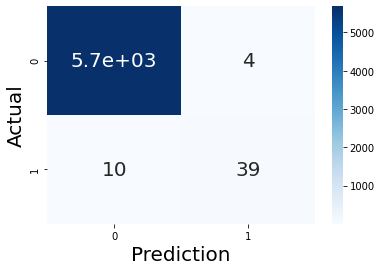

In [15]:
import seaborn as sns
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues')
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)

##Precision<br>
1로 예측한 전체에서 옳게 예측한 건수의 비율

In [16]:
from sklearn.metrics import precision_score
print("Precision Score: ",precision_score(y_test, pred))

Precision Score:  0.9069767441860465


##Recall
실제 1인 전체에서 옳게 예측한 건수의 비율

In [17]:
from sklearn.metrics import recall_score
print("Recall Score: ",recall_score(y_test, pred))

Recall Score:  0.7959183673469388


##F1 Score

재현율과 정밀도의 균형을 나타낸 수치

In [18]:
from sklearn.metrics import f1_score
print("f1 Score: ",f1_score(y_test, pred))

f1 Score:  0.8478260869565216


#Goal
억울하게 사기(1)로 분류되는 경우가 없도록!!<br>
보편적으로 사기(1)임을 입증하는 것보다 사기가 아님(0)을 입증하는 것이 더 어렵<br> 


*   0을 0으로 올바르게 예측
*   1을 1로 올바르게 예측 ->  `Precision` 성능 지표
*   `f1 score`을 향상시켜 전반적인 분류 성능 높이기



#GridSearchCV : 성능 개선 모델

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,refit=True, return_train_score=True)
logreg_cv.fit(x_train,y_train)
y_pred = logreg_cv.best_estimator_.predict(x_test)

scores_df = pd.DataFrame(logreg_cv.cv_results_)
#gridsearchCV 결과는 cv_results_ 딕셔너리로 저장됨

scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]
#딕셔너리를 dataframe으로 변환하여 출력

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.001, 'penalty': 'l2'}",0.996363,7,0.997510,0.996514,0.996016
1,"{'C': 0.01, 'penalty': 'l2'}",0.997709,6,0.998506,0.997012,0.997510
2,"{'C': 0.1, 'penalty': 'l2'}",0.997908,1,0.997510,0.997012,0.997510
3,"{'C': 1.0, 'penalty': 'l2'}",0.997908,2,0.997510,0.997510,0.997510
4,"{'C': 10.0, 'penalty': 'l2'}",0.997908,2,0.997510,0.997510,0.997510
5,"{'C': 100.0, 'penalty': 'l2'}",0.997908,2,0.997510,0.997510,0.997510
6,"{'C': 1000.0, 'penalty': 'l2'}",0.997908,2,0.997510,0.997510,0.997510


In [78]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9979077958221921


#Confusion Matrix : 개선된 성능 지표

In [79]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[8530,    1],
       [  23,   50]])

Text(33.0, 0.5, 'Actual')

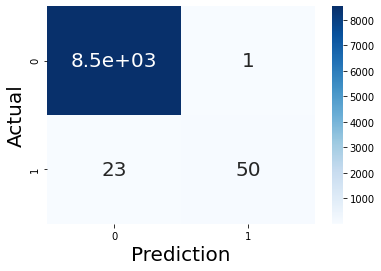

In [84]:
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues')
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [81]:
from sklearn.metrics import precision_score
print("Precision Score: ",precision_score(y_test, y_pred))

Precision Score:  0.9803921568627451


In [82]:
print("Recall Score: ",recall_score(y_test, y_pred))

Recall Score:  0.684931506849315


In [83]:
print("f1 Score: ",f1_score(y_test, y_pred))

f1 Score:  0.8064516129032259
